
<div class="alert alert-info" role="alert">
  <p>
    <center><b>Usage Guidelines</b></center>
  </p>

  <p>
    This lesson is part of the <b>DS Lab core curriculum</b>. For that reason, this notebook can only be used on your WQU virtual machine.
  </p>

  <p>
    This means:
    <ul>
      <li><span style="color: red">ⓧ</span> No downloading this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing of this notebook with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No downloading the embedded videos in this notebook.</li>
      <li><span style="color: red">ⓧ</span> No re-sharing embedded videos with friends or colleagues.</li>
      <li><span style="color: red">ⓧ</span> No adding this notebook to public or private repositories.</li>
      <li><span style="color: red">ⓧ</span> No uploading this notebook (or screenshots of it) to other websites, including websites for study resources.</li>
    </ul>

  </p>
</div>


<font size="+3"><strong>7.1. Meet the DS Lab Applicants</strong></font>

When you decided to start down the path to becoming a data scientist at WQU, the first thing you did was to register an account with us. Then you took our admissions exam test, and began your data science journey! But not everyone who creates an account takes the admissions exam. Is there a way to improve that completion rate?

In this project, you'll help run an experiment to see if sending a reminder email to applicants can increase the likelihood that they'll complete the admissions exam. This type of experiment is called a **hypothesis test** or an **A/B test**.

In this lesson, we'll try to get a better sense of what kind of people sign up for Applied Data Science Lab — where they're from, how old are they, what have they previously studied, and more. 

<div class="alert alert-block alert-warning">
<b>Data Ethics:</b> This project is based on a real experiment that the WQU data science team conducted in June of 2022 There is, however, one important difference. While the data science team used real student data, you're going to use <b>synthetic data</b>. It is designed to have  characteristics that are similar to the real thing without exposing any actual personal data — like names, birthdays, and email addresses — that would violate our students' privacy. 
</div>

In [1]:
from pprint import PrettyPrinter

import pandas as pd
import plotly.express as px
import wqet_grader
from country_converter import CountryConverter
from IPython.display import VimeoVideo
from pymongo import MongoClient

wqet_grader.init("Project 7 Assessment")


In [2]:
VimeoVideo("733383823", h="d6228d4de1", width=600)

The DS Lab student data is stored in a MongoDB database. So we'll start the lesson by creating a `PrettyPrinter`, and connecting to the right database and collection.

In [3]:
VimeoVideo("733383369", h="4d221e7fb7", width=600)

**Task 7.1.1:** Instantiate a `PrettyPrinter`, and assign it to the variable `pp`.

- [Construct a `PrettyPrinter` instance in pprint.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients)

In [2]:
pp = PrettyPrinter(indent=2) # blueprint to object
print("pp type:", type(pp))

pp type: <class 'pprint.PrettyPrinter'>


Next up, let's connect to the MongoDB server.

# Connect

In [4]:
VimeoVideo("733383007", h="13b2c716ac", width=600)

**Task 7.1.2:** Create a client that connects to the database running at `localhost` on port `27017`.

- [What's a <span id='term'>database client?](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients)
- [What's a <span id='term'>database server?](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients)
- [<span id='technique'>Create a client object for a <span id='tool'>MongoDB</span> instance.](../%40textbook/11-databases-mongodb.ipynb#Servers-and-Clients) 

In [3]:
client = MongoClient("localhost", 27017)
print("client type:", type(client))

client type: <class 'pymongo.mongo_client.MongoClient'>


Okay! Let's take a look at the databases that are available to us.

**Task 7.1.3:** Print a list of the databases available on `client`.

- [What's an iterator?](../%40textbook/02-python-advanced.ipynb#Iterators-and-Iterables-)
- [List the databases of a server using PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Exploring-a-Database)
- [Print output using pprint.](../%40textbook/11-databases-mongodb.ipynb#Exploring-a-Database)

In [4]:
pp.pprint(client.list_database_names())

['admin', 'air-quality', 'config', 'local', 'wqu-abtest']


We're interested in the `"wqu-abtest"` database, so let's assign a variable and get moving.

By the way, did you notice our old friend the air quality data? Isn't it nice to know that if you ever wanted to go back and do those projects again, the data will be there waiting for you?

In [5]:
VimeoVideo("733382605", h="e0b87a5ff8", width=600)

**Task 7.1.4:** Assign the `"ds-applicants"` collection in the `"wqu-abtest"` database to the variable name `ds_app`.

- [What's a MongoDB collection?](../%40textbook/11-databases-mongodb.ipynb#Collections)
- [Access a collection in a database using PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Collections)

In [5]:
db = client["wqu-abtest"]
ds_app = db["ds-applicants"]
print("ds_app type:", type(ds_app))

ds_app type: <class 'pymongo.collection.Collection'>


Now let's take a look at what we've got. First, let's find out how many applicants are currently in our collection.

# Explore

In [13]:
VimeoVideo("733382346", h="9da7d3d1d8", width=600)

**Task 7.1.5:** Use the [`count_documents`](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.count_documents) method to see how many documents are in the `ds_app` collection.

- [What's a MongoDB document?](../%40textbook/11-databases-mongodb.ipynb#Documents)
- [Count the documents in a collection using PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Documents) 

<div class="alert alert-block alert-warning">
<b>Warning:</b> The exact number of documents in the database has changed since this video was filmed. So don't worry if you don't get exactly the same numbers as the instructor for the tasks in this project.
</div>

In [6]:
# Count documents in `ds_app`
n_documents = ds_app.count_documents({})
print("Num. documents in 'ds-applicants':", n_documents)

Num. documents in 'ds-applicants': 5025


So that's the number of individual records in the collection, but what do those records look like? The last time we did anything with a MongoDB database, the data was *semi-structured*, and that's true here as well. Recall that semi-structured data is arranged according to some kind of logic, but it can't be displayed in a regular table of rows and columns. 

Let's take a look at how these documents are laid out.

In [17]:
VimeoVideo("733380658", h="a7988083f4", width=600)

**Task 7.1.6:** Use the [`find_one`](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.find_one) method to retrieve one document from the `ds_app` collection and assign it to the variable name `result`.

- [What's <span id='term'>semi-structured data?](../%40textbook/11-databases-mongodb.ipynb#Semi-structured-Data)
- [<span id='technique'>Retrieve a document from a collection using <span id='tool'>PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Retrieving-Data)

In [7]:
result = ds_app.find_one({})
print("result type:", type(result))
pp.pprint(result)

result type: <class 'dict'>
{ '_id': ObjectId('6525d787953844722c8383f8'),
  'admissionsQuiz': 'incomplete',
  'birthday': datetime.datetime(1998, 4, 29, 0, 0),
  'countryISO2': 'GB',
  'createdAt': datetime.datetime(2022, 5, 13, 15, 2, 44),
  'email': 'terry.hassler28@yahow.com',
  'firstName': 'Terry',
  'gender': 'male',
  'highestDegreeEarned': "Bachelor's degree",
  'lastName': 'Hassler'}


See why we shouldn't be using the real data for an assignment like this? Each document includes the applicant's birthday, country of origin, email address, first and last name, and their highest level of educational attainment — all things that would make our students readily identifiable. Good thing we've got synthetic data instead!<span style='color: transparent; font-size:1%'>WQU WorldQuant University Applied Data Science Lab QQQQ</span>

## Nationality

Let's start the analysis. One of the possibilities in each record is the country of origin. We already know WQU is a pretty diverse place, but we can figure out just *how* diverse it is by seeing where applicants are coming from.

First, we'll perform an aggregation to count countries.

In [20]:
VimeoVideo("733379562", h="8ffd2458e0", width=600)

**Task 7.1.7:** Use the [`aggregate`](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.aggregate) method to calculate how many applicants there are from each country.

- [Perform aggregation calculations on documents using PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Analyzing-Data)

<div class="alert alert-block alert-info">
    <p><b>Tip:</b> ISO stands for "<b>I</b>nternational <b>O</b>rganization for <b>S</b>tandardization". So, when you write your query, make sure you're not confusing the letter <code>O</code> with the number <code>0</code>.</p>
</div>

In [17]:
result = ds_app.aggregate(
    [
        {
            # $ on the right: operator, $ on the left: key
            "$group": {
                "_id": "$countryISO2",
                "count": {"$count": {}} 
            }
            
        }
    ]
)
print("result type:", type(result))

result type: <class 'pymongo.command_cursor.CommandCursor'>


In [35]:
[r for r in result][:5] # result is CommandCursor: generator

[{'_id': 'KM', 'count': 2},
 {'_id': 'PH', 'count': 109},
 {'_id': 'PK', 'count': 568},
 {'_id': 'TD', 'count': 10},
 {'_id': 'TG', 'count': 17}]

Next, we'll create and print a DataFrame with the results.

In [9]:
VimeoVideo("733376898", h="fc7f30e75a", width=600)

**Task 7.1.8:** Put your results from the previous task into a DataFrame named `df_nationality`. Your DataFrame should have two columns: `"country_iso2"` and `"count"`. It should be sorted from the smallest to the largest value of `"count"`.

- [Create a DataFrame from a dictionary using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Working-with-DataFrames)
- [Rename a Series in pandas.](../%40textbook/03-pandas-getting-started.ipynb#Rename-a-Series)
- [Sort a DataFrame or Series in pandas.](../%40textbook/03-pandas-getting-started.ipynb#Sorting)

In [18]:
df_nationality = (
    pd.DataFrame(result).rename({"_id": "country_iso2"}, axis="columns").sort_values("count")
)

print("df_nationality type:", type(df_nationality))
print("df_nationality shape", df_nationality.shape)
df_nationality.head()

df_nationality type: <class 'pandas.core.frame.DataFrame'>
df_nationality shape (139, 2)


,country_iso2,count
50,TL,1
107,GY,1
34,AI,1
33,MO,1
46,MK,1


<div class="alert alert-block alert-info">
    <p><b>Tip:</b> If you see that there's no data in <code>df_nationality</code>, it's likely that there's an issue with your query in the previous task.</p>
</div>

Now we have the countries, but they're represented using the [ISO 3166-1 alpha-2 standard](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2), where each country has a two-letter code. It'll be much easier to interpret our data if we have the full country name, so we'll need to do some data enrichment using [country converter](https://github.com/konstantinstadler/country_converter) library.

Since `country_converter` is an open-source library, there are several things to think about before we can bring it into our project. The first thing we need to do is figure out if we're even allowed to use the library for the kind of project we're working on by taking a look at the library's license. `country_converter` has a [GNU General Public License](https://www.gnu.org/licenses/gpl-3.0.en.html), so there are no worries there.

Second, we need to make sure the software is being actively maintained. If the last time anybody changed the library was back in 2014, we're probably going to run into some problems when we try to use it. `country_converter`'s last update is very recent, so we aren't going to have any trouble there either.

Third, we need to see what kinds of quality-control measures are in place. Even if the library was updated five minutes ago and includes a license that gives us permission to do whatever we want, it's going to be entirely useless if it's full of mistakes. Happily, `country_converter`'s testing coverage and build badges look excellent, so we're good to go there as well.

The last thing we need to do is make sure the library will do the things we need it to do by looking at its documentation. `country_converter`'s documentation is very thorough, so if we run into any problems, we'll almost certainly be able to figure out what went wrong. 

`country_converter` looks good across all those dimensions, so let's put it to work!

In [10]:
VimeoVideo("733373453", h="f8e954db9f", width=600)

**Task 7.1.9:** Instantiate a `CountryConverter` object named `cc`, and then use it to add a `"country_name"` column to the DataFrame `df_nationality`.

- Convert country names from one format to another using country converter.
- [Create new columns derived from existing columns in a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns) 

In [21]:
cc = CountryConverter() # data enrichment 
df_nationality["country_name"] = cc.convert(
    df_nationality["country_iso2"], to="name_short"
)

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (139, 3)


,country_iso2,count,country_name
50,TL,1,Timor-Leste
107,GY,1,Guyana
34,AI,1,Anguilla
33,MO,1,Macau
46,MK,1,North Macedonia


That's better. Okay, let's turn that data into a bar chart.

In [11]:
VimeoVideo("733372561", h="2659ff0dc7", width=600)

**Task 7.1.10:** Create a horizontal bar chart of the 10 countries with the largest representation in `df_nationality`. Be sure to label your x-axis `"Frequency [count]"`, your y-axis `"Country"`, and use the title `"DS Applicants by Country"`.

- [What's a bar chart?](../%40textbook/08-visualization-plotly.ipynb#Bar-Chart)
- [Create a bar chart using plotly express.](../%40textbook/08-visualization-plotly.ipynb#Bar-Chart)

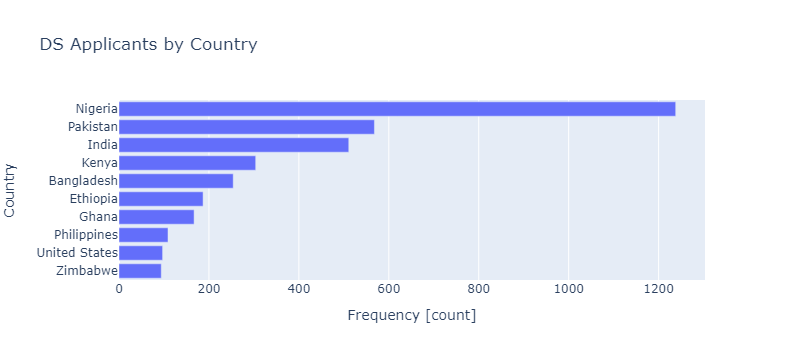

In [23]:
# Create horizontal bar chart
fig = px.bar(
    data_frame=df_nationality.tail(10), x="count", y="country_name",
    orientation="h", title="DS Applicants by Country"
)
# Set axis labels
fig.update_layout(xaxis_title="Frequency [count]", yaxis_title="Country")
fig.show()

That's showing us the raw number of applicants from each country, but since we're working with admissions data, it might be more helpful to see the proportion of applicants each country represents. We can get there by normalizing the dataset.

In [12]:
VimeoVideo("733371952", h="a061e33ab8", width=600)

**Task 7.1.11:** Create a `"count_pct"` column for `df_nationality` that shows the proportion of applicants from each country.

- [Create new columns derived from existing columns in a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns) 

In [26]:
df_nationality["count"].value_counts(normalize=True).sort_values().tail()

4    0.043165
6    0.050360
3    0.107914
2    0.129496
1    0.201439
Name: count, dtype: float64

In [27]:
df_nationality["count_pct"] = (
    (df_nationality["count"] / df_nationality["count"].sum()) * 100
)

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (139, 4)


,country_iso2,count,country_name,count_pct
50,TL,1,Timor-Leste,0.0199
107,GY,1,Guyana,0.0199
34,AI,1,Anguilla,0.0199
33,MO,1,Macau,0.0199
46,MK,1,North Macedonia,0.0199


Now we can turn that into a new bar chart.

In [13]:
VimeoVideo("733371556", h="7cae7252a8", width=600)

**Task 7.1.12:** Recreate your horizontal bar chart of the 10 countries with the largest representation in `df_nationality`, this time with the percentages. Be sure to label your x-axis `"Frequency [%]"`, your y-axis `"Country"`, and use the title `"DS Applicants by Country"`.

- [What's a bar chart?](../%40textbook/08-visualization-plotly.ipynb#Bar-Chart)
- [Create a bar chart using plotly express.](../%40textbook/08-visualization-plotly.ipynb#Bar-Chart)

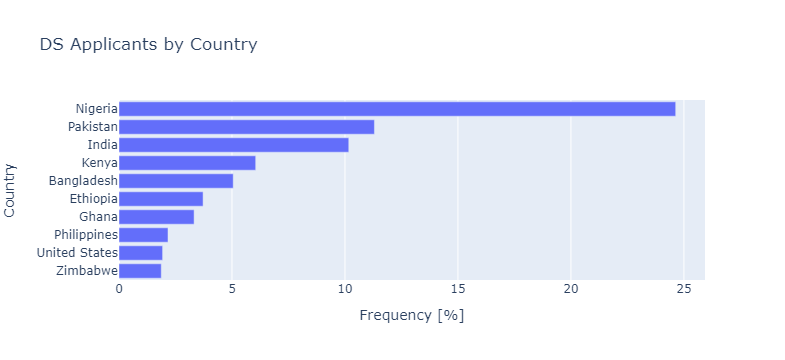

In [28]:
# Create horizontal bar chart
fig = px.bar(
    data_frame=df_nationality.tail(10), x="count_pct", y="country_name",
    orientation="h", title="DS Applicants by Country"
)
# Set axis labels
fig.update_layout(xaxis_title="Frequency [%]", yaxis_title="Country")
fig.show()

Bar charts are useful, but since we're talking about actual places here, let's see how this data looks when we put it on a world map. However, plotly express requires the [ISO 3166-1 alpha-3](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-3) codes. This means that we'll need to add another column to our DataFrame before we can make our visualization.

In [29]:
VimeoVideo("733370726", h="2b21ee76d2", width=600)

**Task 7.1.13:** Add a column named `"country_iso3"` to `df_nationality`. It should contain the 3-letter ISO abbreviation for each country in `"country_iso2"`. 

- [Create new columns derived from existing columns in a DataFrame using pandas.](../%40textbook/03-pandas-getting-started.ipynb#Adding-Columns) 

In [34]:
df_nationality["country_iso3"] = cc.convert(df_nationality["country_iso2"], to="ISO3")

print("df_nationality shape:", df_nationality.shape)
df_nationality.head()

df_nationality shape: (139, 5)


,country_iso2,count,country_name,count_pct,country_iso3
50,TL,1,Timor-Leste,0.0199,TLS
107,GY,1,Guyana,0.0199,GUY
34,AI,1,Anguilla,0.0199,AIA
33,MO,1,Macau,0.0199,MAC
46,MK,1,North Macedonia,0.0199,MKD


Perfect! Let's turn the table into a map!

In [30]:
VimeoVideo("733369606", h="73a380a6c6", width=600)

**Task 7.1.14:** Create a function `build_nat_choropleth` that returns plotly choropleth map showing the `"count"` of DS applicants in each country in the globe. Be sure to set your `projection` to `"natural earth"`, and `color_continuous_scale` to `px.colors.sequential.Oranges`.

- [What's a choropleth map?](../%40textbook/08-visualization-plotly.ipynb#Choropleth-Maps)
- [Create a choropleth map using plotly express.](../%40textbook/08-visualization-plotly.ipynb#Choropleth-Maps)

nat_fig type: <class 'plotly.graph_objs._figure.Figure'>


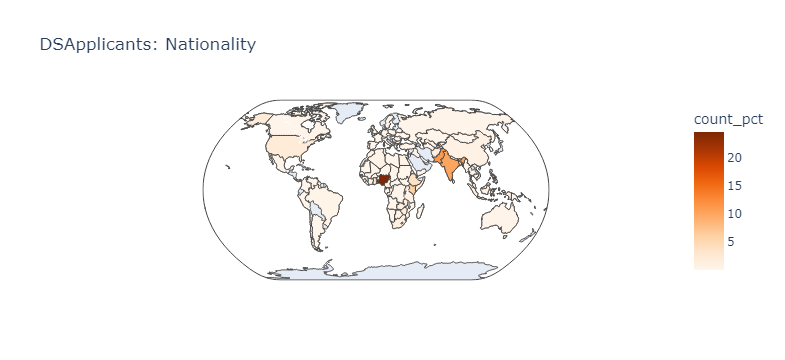

In [36]:
def build_nat_choropleth():
    fig = px.choropleth(
        data_frame=df_nationality,
        locations="country_iso3",
        color="count_pct",
        projection="natural earth",
        color_continuous_scale=px.colors.sequential.Oranges,
        title="DSApplicants: Nationality"
    )
    return fig


nat_fig = build_nat_choropleth()
print("nat_fig type:", type(nat_fig))
nat_fig.show()

<div class="alert alert-block alert-info">
    <p><b>Note:</b> Political borders are subject to change, debate and dispute. As such, you may see borders on this map that you don't agree with. The political boundaries you see in <a href="https://plotly.com/python/map-configuration/">Plotly</a> are based on the <a href="https://www.naturalearthdata.com/">Natural Earth dataset</a>. You can learn more about their disputed boundaries policy <a href="https://www.naturalearthdata.com/about/disputed-boundaries-policy/">here</a>.</p>
</div>

Cool! This is showing us what we knew already: most of the applicants come from Nigeria, India, and Pakistan. But this visualization also shows the global diversity of DS Lab students. Almost every country is represented in our student body!

## Age

Now that we know where the applicants are from, let's see what else we can learn. For instance, how old are DS Lab applicants? We know the birthday of all our applicants, but we'll need to perform another aggregation to calculate their ages. We'll use the `"$birthday"` field and the `"$$NOW"` variable. 

In [31]:
VimeoVideo("733367865", h="6e444cb810", width=600)

**Task 7.1.15:** Use the [`aggregate`](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.aggregate) method to calculate the age for each of the applicants in `ds_app`. Store the results in `result`.

- [Perform aggregation calculations on documents using PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Analyzing-Data)
- [Aggregate data using the `$project` operator in PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Aggregation)
- [Calculate the difference between dates using the `$dateDiff` operator in PyMongo.](../%40textbook/11-databases-mongodb.ipynb#Aggregation)

In [41]:
result = ds_app.aggregate(
    [
        {
            # project == create a new data 
            "$project": {
                "years": {
                    "$dateDiff": {
                        "startDate": "$birthday",
                        "endDate": "$$NOW",
                        "unit": "year"
                    }
                }
            }
        }
    ]
)

print("result type:", type(result))

result type: <class 'pymongo.command_cursor.CommandCursor'>


Once we have the query results, we can put them into a Series.

In [32]:
VimeoVideo("733367340", h="2b926b1e3a", width=600)

**Task 7.1.16:** Read your `result` from the previous task into a DataFrame, and create a Series called `ages`.

- [Create a Series in pandas.](../%40textbook/04-pandas-advanced.ipynb#Select-a-Series-from-a-DataFrame)

In [43]:
ages = pd.DataFrame(result)["years"]

print("ages type:", type(ages))
print("ages shape:", ages.shape)
ages.head()

ages type: <class 'pandas.core.series.Series'>
ages shape: (5025,)


0    26
1    25
2    30
3    40
4    34
Name: years, dtype: int64

And finally, plot a histogram to show the distribution of ages.

In [33]:
VimeoVideo("733366740", h="bb14c884bb", width=600)

**Task 7.1.17:** Create function `build_age_hist` that returns a plotly histogram of `ages`. Be sure to label your x-axis `"Age"`, your y-axis `"Frequency [count]"`, and use the title `"Distribution of DS Applicant Ages"`.

- [What's a histogram?](../%40textbook/07-visualization-pandas.ipynb#Histograms)
- [Create a histogram using plotly express](../%40textbook/08-visualization-plotly.ipynb#Histogram)

age_fig type: <class 'plotly.graph_objs._figure.Figure'>


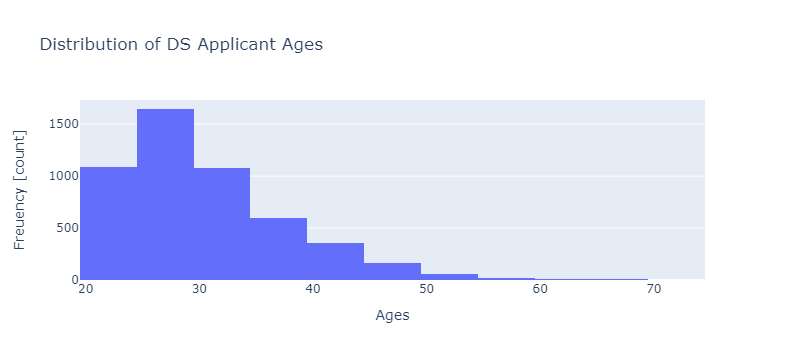

In [49]:
def build_age_hist():
    # Create histogram of `ages`
    fig = px.histogram(x=ages, nbins=20, title="Distribution of DS Applicant Ages")
    # Set axis labels
    fig.update_layout(xaxis_title="Ages", yaxis_title="Freuency [count]")
    return fig

age_fig = build_age_hist()
print("age_fig type:", type(age_fig))
age_fig.show()

It looks like most of our applicants are in their twenties, but we also have applicants in their 70s. What a wonderful example of lifelong learning. Role models for all of us!

## Education

Okay, there's one more attribute left for us to explore: educational attainment. Which degrees do our applicants have? First, let's count the number of applicants in each category...

In [44]:
VimeoVideo("733366435", h="c6d3a83830", width=600)

**Task 7.1.18:** Use the [`aggregate`](https://pymongo.readthedocs.io/en/stable/api/pymongo/collection.html#pymongo.collection.Collection.aggregate) method to calculate value counts for highest degree earned in `ds_app`.

- [Aggregate data in a series using `value_counts` in pandas.](../%40textbook/04-pandas-advanced.ipynb#Working-with-value_counts-in-a-Series)

In [54]:
result = ds_app.aggregate(
    [
        {
            "$group": {
                "_id": "$highestDegreeEarned",
                "count": {"$count": {}}
            }
        }
    ]
)

print("result type:", type(result))

result type: <class 'pymongo.command_cursor.CommandCursor'>


... and create a Series...

In [45]:
VimeoVideo("733365459", h="5c14d30a9e", width=600)

**Task 7.1.19:** Read your `result` from the previous task into a Series `education`.

- [Create a Series in pandas.](../%40textbook/04-pandas-advanced.ipynb#Select-a-Series-from-a-DataFrame)

In [55]:
education = (
    pd.DataFrame(result)
    .rename({"_id": "highest_degree_earned"}, axis="columns")
    .set_index("highest_degree_earned")
    .squeeze()
) # method chaining

print("education type:", type(education))
print("education shape:", education.shape)
education.head()

education type: <class 'pandas.core.series.Series'>
education shape: (5,)


highest_degree_earned
Bachelor's degree               2643
Some College (1-3 years)         612
Doctorate (e.g. PhD)              76
Master's degree                  862
High School or Baccalaureate     832
Name: count, dtype: int64

... and... wait! We need to sort these categories more logically. Since we're talking about the highest level of education our applicants have, we need to sort the categories hierarchically rather than alphabetically or numerically. The order should be: `"High School or Baccalaureate"`, `"Some College (1-3 years)"`, `"Bachelor's Degree"`, `"Master's Degree"`, and `"Doctorate (e.g. PhD)"`. Let's do that with a function.

In [46]:
VimeoVideo("733362518", h="90dd9a3394", width=600)

**Task 7.1.20:** Complete the `ed_sort` function below so that it can be used to sort the index of `education`. When you're satisfied that you're going to end up with a properly-sorted Series, submit your code to the grader.

- What's a dictionary comprehension?
- [Sort a DataFrame or Series in pandas.](../%40textbook/03-pandas-getting-started.ipynb#Sorting)

In [58]:
{k: v for v, k in enumerate(degrees)}

{'High School or Baccalaureate': 0,
 'Some College (1-3 years)': 1,
 "Bachelor's degree": 2,
 "Master's degree": 3,
 'Doctorate (e.g. PhD)': 4}

In [60]:
ed_sort(["Doctorate (e.g. PhD)", "Master's degree", "High School or Baccalaureate", "Bachelor's degree"])

[4, 3, 0, 2]

In [59]:
def ed_sort(counts):
    """Sort array `counts` from highest to lowest degree earned."""
    degrees = [
        "High School or Baccalaureate",
        "Some College (1-3 years)",
        "Bachelor's degree",
        "Master's degree",
        "Doctorate (e.g. PhD)",
    ]
    mapping = {k: v for v, k in enumerate(degrees)}
    sort_order = [mapping[c] for c in counts]
    return sort_order


education.sort_index(key=ed_sort, inplace=True)
education

highest_degree_earned
High School or Baccalaureate     832
Some College (1-3 years)         612
Bachelor's degree               2643
Master's degree                  862
Doctorate (e.g. PhD)              76
Name: count, dtype: int64

In [62]:
wqet_grader.grade("Project 7 Assessment", "Task 7.1.20", education)


Now we can make a bar chart showing the educational attainment of the applicants. Make sure the levels are sorted correctly!

In [47]:
VimeoVideo("733360047", h="b17fffc11b", width=600)

**Task 7.1.21:** Create a function `build_ed_bar` that returns a plotly horizontal bar chart of `education`. Be sure to label your x-axis `"Frequency [count]"`, y-axis `"Highest Degree Earned"`, and use the title `"DS Applicant Education Levels"`.

- [What's a bar chart?](../%40textbook/08-visualization-plotly.ipynb#Bar-Chart)
- [Create a bar chart using plotly express.](../%40textbook/08-visualization-plotly.ipynb#Bar-Chart)

ed_fig type: <class 'plotly.graph_objs._figure.Figure'>


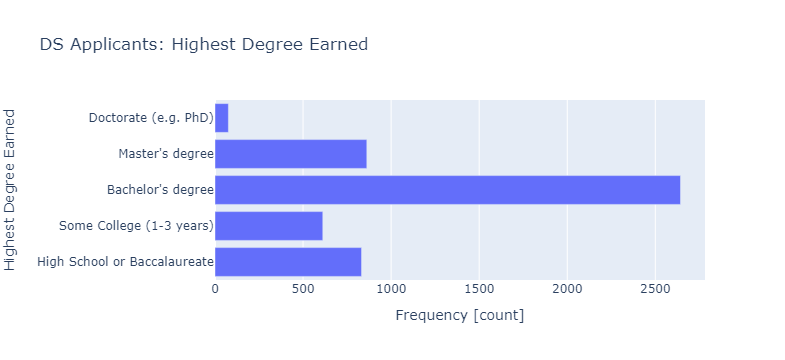

In [63]:
def build_ed_bar():
    # Create bar chart
    fig = px.bar(
        x=education, y=education.index,
        orientation="h",
        title="DS Applicants: Highest Degree Earned"
    )
    # Add axis labels
    fig.update_layout(xaxis_title="Frequency [count]", yaxis_title="Highest Degree Earned")
    return fig


ed_fig = build_ed_bar()
print("ed_fig type:", type(ed_fig))
ed_fig.show()

---
Copyright 2023 WorldQuant University. This
content is licensed solely for personal use. Redistribution or
publication of this material is strictly prohibited.
